# 数値変数の変換  
GBDTは数値の大小関係に注目しているため　スケール変換はほとんど影響を与えないことに注意  
NNや線形には効果あり

## 線形変換

### 標準化 standardization  

In [ ]:
train_x = pd.DataFrame(np.arange(9).reshape(3, 3),
                   columns=['num_cols', 'col_1', 'col_2'])
print(train_x)

con_cols = train_x.select_dtypes(include='int64').columns.tolist() 
print(con_cols)

   num_cols  col_1  col_2
0         0      1      2
1         3      4      5
2         6      7      8
['num_cols', 'col_1', 'col_2']


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

train_x = pd.DataFrame(np.arange(9).reshape(3, 3),
                   columns=['con_col1', 'con_col2', 'con_col3'])
print(train_x)

con_cols = train_x.select_dtypes(include='int64').columns.tolist() 
test_x = pd.DataFrame({'con_col1': [100, 200, 300]
                       , 'con_col2': [1000, 2000, 3000]
                       , 'con_col3': [6000, 5000, 4000]})


# 学習データに基づいて複数列の標準化を定義
scaler = StandardScaler()
scaler.fit(train_x[con_cols])

# 変換後のデータで各列を置換
train_x[con_cols] = scaler.transform(train_x[con_cols])
test_x[con_cols] = scaler.transform(test_x[con_cols])
print(train_x)
print(test_x)

   num_col1  num_col2  num_col3
0         0         1         2
1         3         4         5
2         6         7         8
   num_col1  num_col2  num_col3
0 -1.224745 -1.224745 -1.224745
1  0.000000  0.000000  0.000000
2  1.224745  1.224745  1.224745
     num_col1     num_col2     num_col3
0   39.600084   406.615297  2447.448501
1   80.424913   814.863588  2039.200211
2  121.249742  1223.111878  1630.951920


### Min-Maxスケーリング  
通常は0から1の区間に押し込める方法
- 標準化の方が使われることが多い  
- 変換後の平均が０にならない
- 外れ値の悪影響をより受けやすい
- スケールが決まっている（画像データの画素数0-255等）の場合は使える

In [ ]:
from sklearn.preprocessing import MinMaxScaler

train_x = pd.DataFrame(np.arange(9).reshape(3, 3),
                  columns=['con_col1', 'con_col2', 'con_col3'])
print(train_x)

con_cols = train_x.select_dtypes(include='int64').columns.tolist() 
test_x = pd.DataFrame({'con_col1': [100, 200, 300]
                      , 'con_col2': [1000, 2000, 3000]
                      , 'con_col3': [6000, 5000, 4000]})

# 学習データに基づいて複数列のMin-Maxスケーリングを定義
scaler = MinMaxScaler()
scaler.fit(train_x[con_cols])

# 変換後のデータで各列を置換
train_x[con_cols] = scaler.transform(train_x[con_cols])
test_x[con_cols] = scaler.transform(test_x[con_cols])

print(train_x)
print(test_x)

   con_col1  con_col2  con_col3
0         0         1         2
1         3         4         5
2         6         7         8
   con_col1  con_col2  con_col3
0       0.0       0.0       0.0
1       0.5       0.5       0.5
2       1.0       1.0       1.0
    con_col1    con_col2    con_col3
0  16.666667  166.500000  999.666667
1  33.333333  333.166667  833.000000
2  50.000000  499.833333  666.333333


## 非線形変換  
線形変換は変数の分布は伸縮するだけで形状そのものは変化しない  
非線形変換は変数の分布の形状を変化させる


### 対数, log(x+1), 絶対値の対数  
金額やカウントを表す変数は裾が伸びた分布になりがち　対数変換を行うことがある  
0が値に入ると発散するので+1をつける方法推奨
負の数は変換できないので後で符号をつける（x3のやり方）

In [ ]:
import numpy as np
x = np.array([1.0, 10.0, 100.0, 1000.0, 10000.0])

# 単に対数をとる
x1 = np.log(x)
print(x1)
# 1を加えたあとに対数をとる
x2 = np.log1p(x)
print(x2)
# 絶対値の対数をとってから元の符号を付加する
x3 = np.sign(x) * np.log(np.abs(x))
print(x3)

[0.         2.30258509 4.60517019 6.90775528 9.21034037]
[0.69314718 2.39789527 4.61512052 6.90875478 9.21044037]
[0.         2.30258509 4.60517019 6.90775528 9.21034037]


### Box-Cox変換  
対数変換を一般化したもの  
λ＝0が対数変換

In [ ]:
import pandas as pd
import numpy as np

train_x = pd.DataFrame(np.arange(9).reshape(3, 3),
                  columns=['con_col1', 'con_col2', 'con_col3'])

con_cols = train_x.select_dtypes(include='int64').columns.tolist() 
test_x = pd.DataFrame({'con_col1': [100, 200, 300]
                      , 'con_col2': [1000, 2000, 3000]
                      , 'con_col3': [6000, 5000, 4000]})


# 正の値のみをとる変数を変換対象としてリストに格納する
# なお、欠損値も含める場合は、(~(train_x[c] <= 0.0)).all() などとする必要があるので注意
pos_cols = [c for c in con_cols if (train_x[c] > 0.0).all() and (test_x[c] > 0.0).all()]
print(pos_cols)
from sklearn.preprocessing import PowerTransformer

# 学習データに基づいて複数列のBox-Cox変換を定義
pt = PowerTransformer(method='box-cox')
pt.fit(train_x[pos_cols])

# 変換後のデータで各列を置換
train_x[pos_cols] = pt.transform(train_x[pos_cols])
test_x[pos_cols] = pt.transform(test_x[pos_cols])

print(train_x)
print(test_x)

['con_col2', 'con_col3']
   con_col1  con_col2  con_col3
0         0 -1.297639 -1.278116
1         3  0.161890  0.114831
2         6  1.135749  1.163285
   con_col1   con_col2    con_col3
0       100  51.116821  186.085090
1       200  75.307175  167.541193
2       300  94.232637  147.297564


### Yeo-Johnson変換  
負の値を持つ変数にも適用可能

In [ ]:
from sklearn.preprocessing import PowerTransformer

# 学習データに基づいて複数列のYeo-Johnson変換を定義
pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_x[con_cols])

# 変換後のデータで各列を置換
train_x[con_cols] = pt.transform(train_x[con_cols])
test_x[con_cols] = pt.transform(test_x[con_cols])
print(train_x)
print(test_x)

   con_col1  con_col2  con_col3
0 -1.297639 -1.244967 -1.238248
1  0.161890  0.041498  0.027468
2  1.135749  1.203468  1.210780
    con_col1    con_col2    con_col3
0  13.096765  150.094552  535.359755
1  20.111602  250.843316  470.166239
2  25.607246  337.914217  400.959650


## binning

In [ ]:
import pandas as pd
import numpy as np

x = [1, 7, 5, 4, 6, 3]

# pandasのcut関数でbinningを行う

# binの数を指定する場合
binned = pd.cut(x, 3, labels=False)
print(binned)
# [0 2 1 1 2 0] - 変換された値は3つのbinのどれに入ったかを表す

# binの範囲を指定する場合（3.0以下、3.0より大きく5.0以下、5.0より大きい）
bin_edges = [-float('inf'), 3.0, 5.0, float('inf')]
binned = pd.cut(x, bin_edges, labels=False)
print(binned)
# [0 2 1 1 2 0] - 変換された値は3つのbinのどれに入ったかを表す

[0 2 1 1 2 0]
[0 2 1 1 2 0]


## 順位変換

In [ ]:
import pandas as pd
import numpy as np

x = [10, 20, 30, 0, 40, 40]

# pandasのrank関数で順位に変換する
rank = pd.Series(x).rank()
print(rank.values)
# はじまりが1、同順位があった場合は平均の順位となる
# [2. 3. 4. 1. 5.5 5.5]

# numpyのargsort関数を2回適用する方法で順位に変換する
order = np.argsort(x)
rank = np.argsort(order)
print('x', x)
print('order', order)
print('rank', rank)
# はじまりが0、同順位があった場合はどちらかが上位となる
# [1 2 3 0 4 5]

[2.  3.  4.  1.  5.5 5.5]
x [10, 20, 30, 0, 40, 40]
order [3 0 1 2 4 5]
rank [1 2 3 0 4 5]


## RankGauss  
数値変数を順位に変換した後に順序を保ったまま正規分布に変換する手法  
ニューラルネットでモデルを作成する際の変換として通常の標準化よりもよい性能を出す

In [ ]:
from sklearn.preprocessing import QuantileTransformer

train_x = pd.DataFrame(np.arange(9).reshape(3, 3),
                  columns=['con_col1', 'con_col2', 'con_col3'])

con_cols = train_x.select_dtypes(include='int64').columns.tolist() 
test_x = pd.DataFrame({'con_col1': [100, 200, 300]
                      , 'con_col2': [1000, 2000, 3000]
                      , 'con_col3': [6000, 5000, 4000]})


# 学習データに基づいて複数列のRankGaussによる変換を定義
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(train_x[con_cols])

# 変換後のデータで各列を置換
train_x[con_cols] = transformer.transform(train_x[con_cols])
test_x[con_cols] = transformer.transform(test_x[con_cols])

print('train: ', train_x)
print('test: ', test_x)

train:     con_col1  con_col2  con_col3
0 -5.199338 -5.199338 -5.199338
1  0.000000  0.000000  0.000000
2  5.199338  5.199338  5.199338
test:     con_col1  con_col2  con_col3
0  5.199338  5.199338  5.199338
1  5.199338  5.199338  5.199338
2  5.199338  5.199338  5.199338


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (100) is greater than the total number of samples (3). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


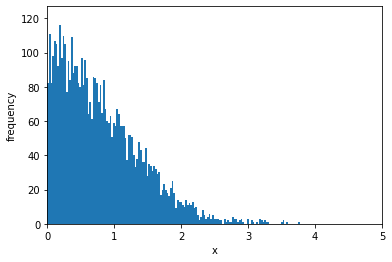

In [ ]:
import matplotlib.pyplot as plt
rand = np.random.normal(10, 2, 10000)
from sklearn.preprocessing import PowerTransformer

# 学習データに基づいて複数列のBox-Cox変換を定義
pt = PowerTransformer(method='box-cox')
pt.fit(rand.reshape(-1, 1))

rand = pt.transform(rand.reshape(-1, 1))
plt.hist(rand, bins=300)
plt.xlabel('x')
plt.ylabel('frequency')
plt.xlim(0, 5)
plt.show()

In [ ]:
print(rand.reshape(1, -1))


[[ 1.42146626  0.87583116  0.41495805 ...  1.46899293 -1.77275443
  -1.76838905]]


# カテゴリ変数の変換

## One Hot Encording  
- 水準が多すぎると悪影響があるため  
  - 別のencodingを検討する
  - 水準をグルーピングしてカテゴリ変数の水準を減らす
  - 頻度の少ないカテゴリを全て「その他のカテゴリ」のようにまとめてしまう

In [ ]:
import pandas as pd
import numpy as np

train_x = pd.DataFrame({'cat_col1': ['A', 'B', 'C']
                        , 'cat_col2': ['D', 'E', 'F']
                        , 'cat_col3': ['G', 'G', 'H']
                        })

test_x = pd.DataFrame({'cat_col1': ['A', 'A', 'C']
                        , 'cat_col2': ['D', 'E', 'E']
                        , 'cat_col3': ['G', 'G', 'H']
                       })

# train_x.info()


cat_cols = train_x.select_dtypes(include='object').columns.tolist() 
print('cat_cols: ', cat_cols)
# 学習データとテストデータを結合してget_dummiesによるone-hot encodingを行う
all_x = pd.concat([train_x, test_x])
all_x = pd.get_dummies(all_x, columns=cat_cols)

# 学習データとテストデータに再分割
train_x = all_x.iloc[:train_x.shape[0], :].reset_index(drop=True)
test_x = all_x.iloc[train_x.shape[0]:, :].reset_index(drop=True)

display('train_x: ', train_x.head())
display('test_x: ', test_x.head())

cat_cols:  ['cat_col1', 'cat_col2', 'cat_col3']


'train_x: '

,cat_col1_A,cat_col1_B,cat_col1_C,cat_col2_D,cat_col2_E,cat_col2_F,cat_col3_G,cat_col3_H
0,1,0,0,1,0,0,1,0
1,0,1,0,0,1,0,1,0
2,0,0,1,0,0,1,0,1


'test_x: '

,cat_col1_A,cat_col1_B,cat_col1_C,cat_col2_D,cat_col2_E,cat_col2_F,cat_col3_G,cat_col3_H
0,1,0,0,1,0,0,1,0
1,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,1


## frequency encoding(Count encoding)
水準の出現回数でカテゴリ変数を置き換える方法
- 水準の出現回数と目的変数の間に関連性がある場合は効果がある

In [ ]:
import pandas as pd
import numpy as np

train_x = pd.DataFrame({'cat_col1': ['A', 'B', 'C']
                        , 'cat_col2': ['D', 'E', 'F']
                        , 'cat_col3': ['G', 'G', 'H']
                        })

test_x = pd.DataFrame({'cat_col1': ['A', 'A', 'C']
                        , 'cat_col2': ['D', 'E', 'E']
                        , 'cat_col3': ['G', 'G', 'H']
                       })

cat_cols = train_x.select_dtypes(include='object').columns.tolist() 

# 変数をループしてfrequency encoding
for c in cat_cols:
    print(c)
    freq = train_x[c].value_counts()
    display(freq)
    print('type of freq: ', type(freq))
    # カテゴリの出現回数で置換
    # pandas Seriesでで置換したいときは.mapで対応できる
    train_x[c] = train_x[c].map(freq)
    test_x[c] = test_x[c].map(freq)
    display('train_x: ', train_x)
    display('test_x: ', test_x)

cat_col1


A    1
C    1
B    1
Name: cat_col1, dtype: int64

type of freq:  <class 'pandas.core.series.Series'>


'train_x: '

,cat_col1,cat_col2,cat_col3
0,1,D,G
1,1,E,G
2,1,F,H


'test_x: '

,cat_col1,cat_col2,cat_col3
0,1,D,G
1,1,E,G
2,1,E,H


cat_col2


F    1
E    1
D    1
Name: cat_col2, dtype: int64

type of freq:  <class 'pandas.core.series.Series'>


'train_x: '

,cat_col1,cat_col2,cat_col3
0,1,1,G
1,1,1,G
2,1,1,H


'test_x: '

,cat_col1,cat_col2,cat_col3
0,1,1,G
1,1,1,G
2,1,1,H


cat_col3


G    2
H    1
Name: cat_col3, dtype: int64

type of freq:  <class 'pandas.core.series.Series'>


'train_x: '

,cat_col1,cat_col2,cat_col3
0,1,1,2
1,1,1,2
2,1,1,1


'test_x: '

,cat_col1,cat_col2,cat_col3
0,1,1,2
1,1,1,2
2,1,1,1


## Target Encoding
Foldを分けてカテゴリごとの目的変数の平均値を算出して割り当てる方法  
- 時系列データでは時刻によってレコード発生頻度が異なることがあるので効かないイメージ

In [ ]:
import pandas as pd
import numpy as np

train_x = pd.DataFrame({'cat_col1': ['A', 'B', 'C', 'A', 'A', 'B', 'B', 'C', 'C', 'C']
                        , 'cat_col2': ['D', 'E', 'F', 'D', 'D', 'F', 'F', 'E', 'E', 'E']
                        , 'cat_col3': ['G', 'G', 'H', 'H', 'H', 'I', 'I', 'I', 'G', 'G']
                        })

test_x = pd.DataFrame({'cat_col1': ['A', 'A', 'C', 'B', 'A', 'B', 'B', 'B', 'C', 'C']
                        , 'cat_col2': ['D', 'E', 'F', 'D', 'D', 'F', 'F', 'E', 'E', 'E']
                        , 'cat_col3': ['D', 'E', 'F', 'D', 'D', 'F', 'F', 'E', 'E', 'E']
                       })

train_y = [30, 90, 20, 30, 90, 20, 30, 90, 20, 30]

cat_cols = train_x.select_dtypes(include='object').columns.tolist() 


from sklearn.model_selection import KFold

# 変数をループしてtarget encoding
for c in cat_cols:
    # 学習データ全体で各カテゴリにおけるtargetの平均を計算
    data_tmp = pd.DataFrame({c: train_x[c], 'target': train_y})
    # print('data_tmp: ')
    # print(data_tmp)
    
    target_mean = data_tmp.groupby(c)['target'].mean()
    # print('target_mean: ')
    # print(target_mean)

    # テストデータのカテゴリを置換
    # テストデータはトレーニングデータ全部でTargetEncordingなのでFoldを切る必要がない
    test_x[c] = test_x[c].map(target_mean)
    # print('test_x', c )
    # print(test_x[c])

    # 学習データの変換後の値を格納する配列を準備
    tmp = np.repeat(np.nan, train_x.shape[0])

    # 学習データを分割
    kf = KFold(n_splits=3, shuffle=True, random_state=72)
    for idx_1, idx_2 in kf.split(train_x):
        # print('idx_1:')
        # print(idx_1)
        # print('idx_2:')
        # print(idx_2)
        # out-of-foldで各カテゴリにおける目的変数の平均を計算
        target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
        # print('target_mean')
        # print(target_mean)
        # 変換後の値を一時配列に格納
        tmp[idx_2] = train_x[c].iloc[idx_2].map(target_mean)
        # print(tmp)
    # 変換後のデータで元の変数を置換
    train_x[c] = tmp

## CVごとのTargetEncording  
CVを行う場合はFoldごとのtrデータごとにTargetEncordingしないとリークが起こる  
先にTargetEncordingしてしまうとCVした時にはva側のデータも取り込んだtr側のTargetEncording数を利用することになるため

In [ ]:
from sklearn.model_selection import KFold

import pandas as pd
import numpy as np

train_x = pd.DataFrame({'cat_col1': ['A', 'B', 'C', 'A', 'A', 'B', 'B', 'C', 'C', 'C']
                        , 'cat_col2': ['D', 'E', 'F', 'D', 'D', 'F', 'F', 'E', 'E', 'E']
                        , 'cat_col3': ['G', 'G', 'H', 'H', 'H', 'I', 'I', 'I', 'G', 'G']
                        })

test_x = pd.DataFrame({'cat_col1': ['A', 'A', 'C', 'B', 'A', 'B', 'B', 'B', 'C', 'C']
                        , 'cat_col2': ['D', 'E', 'F', 'D', 'D', 'F', 'F', 'E', 'E', 'E']
                        , 'cat_col3': ['D', 'E', 'F', 'D', 'D', 'F', 'F', 'E', 'E', 'E']
                       })

train_y = pd.DataFrame({'y': [30, 90, 20, 30, 90, 20, 30, 90, 20, 30]})
print('train_y: ')
print(type(train_y))

cat_cols = train_x.select_dtypes(include='object').columns.tolist()
y = list(train_y.columns)
y = y[0]
print(y)
print(type(y))

# クロスバリデーションのfoldごとにtarget encodingをやり直す
kf = KFold(n_splits=3, shuffle=True, random_state=71)
for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):

    # 学習データからバリデーションデータを分ける
    tr_x, va_x = train_x.iloc[tr_idx].copy(), train_x.iloc[va_idx].copy()
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    print('tr_y')
    print(tr_y)
    display(type(tr_y))

    # 変数をループしてtarget encoding
    for c in cat_cols:
        # 学習データ全体で各カテゴリにおけるtargetの平均を計算
        data_tmp = pd.DataFrame({c: tr_x[c], 'target': tr_y[y]})
        print('data_tmp')
        print(data_tmp)
        target_mean = data_tmp.groupby(c)['target'].mean()
        # バリデーションデータのカテゴリを置換
        va_x.loc[:, c] = va_x[c].map(target_mean)

        # 学習データの変換後の値を格納する配列を準備
        tmp = np.repeat(np.nan, tr_x.shape[0])
        kf_encoding = KFold(n_splits=4, shuffle=True, random_state=72)
        for idx_1, idx_2 in kf_encoding.split(tr_x):
            # out-of-foldで各カテゴリにおける目的変数の平均を計算
            target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
            # 変換後の値を一時配列に格納
            tmp[idx_2] = tr_x[c].iloc[idx_2].map(target_mean)

        tr_x.loc[:, c] = tmp

    # 必要に応じてencodeされた特徴量を保存し、あとで読み込めるようにしておく

train_y: 
<class 'pandas.core.frame.DataFrame'>
y
<class 'str'>
tr_y
    y
0  30
1  90
2  20
7  90
8  20
9  30


pandas.core.frame.DataFrame

data_tmp
  cat_col1  target
0        A      30
1        B      90
2        C      20
7        C      90
8        C      20
9        C      30
data_tmp
  cat_col2  target
0        D      30
1        E      90
2        F      20
7        E      90
8        E      20
9        E      30
data_tmp
  cat_col3  target
0        G      30
1        G      90
2        H      20
7        I      90
8        G      20
9        G      30
tr_y
    y
0  30
3  30
4  90
5  20
6  30
7  90
8  20


pandas.core.frame.DataFrame

data_tmp
  cat_col1  target
0        A      30
3        A      30
4        A      90
5        B      20
6        B      30
7        C      90
8        C      20
data_tmp
  cat_col2  target
0        D      30
3        D      30
4        D      90
5        F      20
6        F      30
7        E      90
8        E      20
data_tmp
  cat_col3  target
0        G      30
3        H      30
4        H      90
5        I      20
6        I      30
7        I      90
8        G      20
tr_y
    y
1  90
2  20
3  30
4  90
5  20
6  30
9  30


pandas.core.frame.DataFrame

data_tmp
  cat_col1  target
1        B      90
2        C      20
3        A      30
4        A      90
5        B      20
6        B      30
9        C      30
data_tmp
  cat_col2  target
1        E      90
2        F      20
3        D      30
4        D      90
5        F      20
6        F      30
9        E      30
data_tmp
  cat_col3  target
1        G      90
2        H      20
3        H      30
4        H      90
5        I      20
6        I      30
9        G      30


## Embedding  
単語やカテゴリ変数のような離散的な表現を十数ベクトルに変換する方法（分散表現ともいう）  
実数ベクトル：単語やカテゴリ変数を意味・性質が表現された実数ベクトルに変換したもの  
- 自然言語処理での学習済みembedding  
  - Word2Vec
  - GloVe
  - fastText  
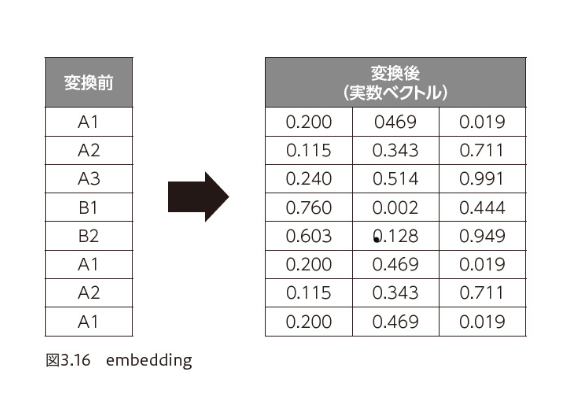


## 順序変数  
決定木系のモデルでは変数の順序しか依存しないため序列はそのまま整数に置き換えて数値変数にすれば良い  
## カテゴリ変数の値の意味  
- ABC-00123のような型番の場合前者後者で分て取り扱う方が良い場合がある  
- 3, Eのように数字エイジが混在している場合、数字か否かを特徴量にする  
- AB, ACE, BCDEのように文字数に違いがある場合、文字数を特徴量にする  

## 日付・時刻を表す変数変換

### trとのva分割  
testデータがtrainデータの未来の予想するタスクの場合は工夫が必要（ほとんどこの場合になる）  
単純に年を特徴量にするとtestデータは外挿データを推論することになるので精度が悪化する可能性がある  
- 年の情報を特徴量に含めない  
- testにしか存在しない年を学習データに存在する最新の年に置換する  
  - 将来の目的変数の傾向は直近の年の傾向に近いであろうという仮定に基づいている  
- trainデータ特徴量と目的変数の関係性がtestでも同様かを確認する  
  - 冬に売り上げが落ちたところをある年から施策を変えたことで改善された場合、それ以前のデータから学んだ月の特徴量は将来の予想で冬の売上落ち込みを導いてしまう

## 周期性の考慮
- GBDT系は各月の傾向を各々で抽出できるので悪影響は出にくい
- 線形モデルでは悪影響が出る場合がある（左右対称の傾向の場合は月の係数が０になる）
- one-hotを行う方法もあるが月同士の近さの概念がなくなってしまう
- 月ブロックを作成することで月同士の近さは保たれる
- **target encodingで目的変数の値に相関するようにする**

### 年の扱い方  
- 年の特徴量を単純に加える  
- 年の特徴量を加えるが、テストデータにのみ存在する年を学習データの最新の年に置換する  
- 年の特徴量をあえて含めない  
- 年や月の情報を使って学習データとして使う期間を制限する
  
### 月の扱い方
基本的にはそのまま数値としてでも良いが2年未満の学習データしかない場合は注意
- target encodingあり  
- 月ブロックもあり  
  
### 日の扱い方
- 特徴のありそうな日のみ日変数を作る
- 月の初日を0.0末日は1.0となるように変換した値を特徴量とする  
  - 月末にかけて駆け込みでのユーザ行動があるような場合に有効
  - 1/1: (1-1)/(31-1) 1/3: (3-1)/(31-1) 1/31: (31-1)/(31-1)

### 年月・月日の扱い方
時間的な傾向をより細かく、時間的は情報を丸めて過学習を抑えようとする特徴量になる

# 他のテーブルの結合
1対多の場合の集約例

In [ ]:
import pandas as pd
import numpy as np

train = pd.DataFrame({'user_id': ['A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C']
                      , 'product_id': ['1', '1', '2', '2', '2', '3', '3', '1', '2', '3']
                      })

product_master = pd.DataFrame({'product_id': ['1', '2', '3']
                      , 'name': ['abc', 'efg', 'hij']
                      })


# 図の形式のデータフレームがあるとする
# train         : 学習データ（ユーザID, 商品ID, 目的変数などの列がある）
# product_master: 商品マスタ（商品IDと商品の情報を表す列がある）
# user_log      : ユーザの行動のログデータ（ユーザIDと各行動の情報を表す列がある）

# 商品マスタを学習データと結合する
train_tmp = train.merge(product_master, on='product_id', how='left')
#対象列の行数を取得できる
user_log_agg = train_tmp.groupby('user_id').size().reset_index().rename(columns={0: 'user_count'})

In [ ]:
display(train_tmp)
display(user_log_agg)

,user_id,product_id,name
0,A,1,abc
1,A,1,abc
2,B,2,efg
3,B,2,efg
4,B,2,efg
5,B,3,hij
6,B,3,hij
7,C,1,abc
8,C,2,efg
9,C,3,hij


user_id
A    2
B    5
C    3
dtype: int64

# 時系列データの扱い

## ワイドフォーマットとロングフォーマットの変換
- ワイドフォーマット
  - 注目する変数しか保持できない
  - 変数の時系列的な変化が見やすい
  - ラグ特徴量をとる場合に扱いやすい
  - 学習する際にはロングフォーマットへの変換が必要

- ロングフォーマット  
  ワイドフォーマットの逆が言える

In [ ]:
import os
import pandas as pd


# パス移動
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input"

# path先フォルダ内のファイルを確認
DATA_PATH = "./"
for filename in os.listdir(DATA_PATH):
    print(filename)

# ワイドフォーマットのデータを読み込む
df_wide = pd.read_csv('./time_series_wide.csv', index_col=0)
# インデックスの型を日付型に変更する
df_wide.index = pd.to_datetime(df_wide.index)

print(df_wide.iloc[:5, :3])
'''
              A     B     C
date
2016-07-01  532  3314  1136
2016-07-02  798  2461  1188
2016-07-03  823  3522  1711
2016-07-04  937  5451  1977
2016-07-05  881  4729  1975
'''

# ロングフォーマットに変換する
df_long = df_wide.stack().reset_index(1)
df_long.columns = ['id', 'value']

print(df_long.head(10))
'''
          id  value
date
2016-07-01  A    532
2016-07-01  B   3314
2016-07-01  C   1136
2016-07-02  A    798
2016-07-02  B   2461
2016-07-02  C   1188
2016-07-03  A    823
2016-07-03  B   3522
2016-07-03  C   1711
2016-07-04  A    937
...
'''

# ワイドフォーマットに戻す
df_wide = df_long.pivot(index=None, columns='id', values='value')
print(df_wide)

/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input
time_series_wide.csv
              A     B     C
date                       
2016-07-01  532  3314  1136
2016-07-02  798  2461  1188
2016-07-03  823  3522  1711
2016-07-04  937  5451  1977
2016-07-05  881  4729  1975
           id  value
date                
2016-07-01  A    532
2016-07-01  B   3314
2016-07-01  C   1136
2016-07-02  A    798
2016-07-02  B   2461
2016-07-02  C   1188
2016-07-03  A    823
2016-07-03  B   3522
2016-07-03  C   1711
2016-07-04  A    937
id            A     B     C
date                       
2016-07-01  532  3314  1136
2016-07-02  798  2461  1188
2016-07-03  823  3522  1711
2016-07-04  937  5451  1977
2016-07-05  881  4729  1975
...         ...   ...   ...
2016-12-27  840  4573  1850
2016-12-28  943  4511  1764
2016-12-29  978  4599  1787
2016-12-30  907  4243  2069
2016-12-31  869  4703  2233

[184 rows x 3 columns]


## ラグ特徴量

In [ ]:
import os
import pandas as pd


# パス移動
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input"

# path先フォルダ内のファイルを確認
DATA_PATH = "./"
for filename in os.listdir(DATA_PATH):
    print(filename)

# ワイドフォーマットのデータを読み込む
df_wide = pd.read_csv('./time_series_wide.csv', index_col=0)

/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input
time_series_wide.csv


In [ ]:
df_wide.head()
lag1 = df_wide.shift(1).rename(columns={'A': 'A_lag1', 'B': 'B_lag1', 'C': 'C_lag1'})
lag7 = df_wide.shift(7).rename(columns={'A': 'A_lag7', 'B': 'B_lag7', 'C': 'C_lag7'})

df_wide_lag = pd.concat([df_wide, lag1, lag7], axis=1)

display(df_wide_lag.head(10))

# ロングフォーマットに変換する
df_long = df_wide_lag.stack().reset_index(1)
df_long.columns = ['id', 'value']

display(df_long.head(10))

,A,B,C,A_lag1,B_lag1,C_lag1,A_lag7,B_lag7,C_lag7
date,,,,,,,,,
2016-07-01,532,3314,1136,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,798,2461,1188,532.0,3314.0,1136.0,NaN,NaN,NaN
2016-07-03,823,3522,1711,798.0,2461.0,1188.0,NaN,NaN,NaN
2016-07-04,937,5451,1977,823.0,3522.0,1711.0,NaN,NaN,NaN
2016-07-05,881,4729,1975,937.0,5451.0,1977.0,NaN,NaN,NaN
2016-07-06,931,4694,1937,881.0,4729.0,1975.0,NaN,NaN,NaN
2016-07-07,989,4077,1943,931.0,4694.0,1937.0,NaN,NaN,NaN
2016-07-08,905,4555,2112,989.0,4077.0,1943.0,532.0,3314.0,1136.0
2016-07-09,823,4467,1964,905.0,4555.0,2112.0,798.0,2461.0,1188.0


,id,value
date,,
2016-07-01,A,532.0
2016-07-01,B,3314.0
2016-07-01,C,1136.0
2016-07-02,A,798.0
2016-07-02,B,2461.0
2016-07-02,C,1188.0
2016-07-02,A_lag1,532.0
2016-07-02,B_lag1,3314.0
2016-07-02,C_lag1,1136.0


### 移動平均

In [ ]:
a = pd.DataFrame({'A': [1, 2]})
b = pd.DataFrame({'B': [2, 3]})

display(a)
display(b)

ab = pd.concat([a, b], axis=1)
display(ab)

,A
0,1
1,2


,B
0,2
1,3


,A,B
0,1,2
1,2,3


In [ ]:
# 1期前から7期間の移動平均を算出
ave3 = df_wide.shift(1).rolling(window=3).mean().rename(columns={'A': 'A_ave3', 'B': 'B_ave3', 'C': 'C_ave3'})
ave = pd.concat([df_wide, ave3], axis=1)
display(ave.head())

# 1期前から7期間の最大値を算出
max7 = df_wide.shift(1).rolling(window=7).max().rename(columns={'A': 'A_max7', 'B': 'B_max7', 'C': 'C_max7'})
max = pd.concat([df_wide, max7], axis=1)
display(max.head())

# 7期前, 14期前, 21期前, 28期前の値の平均
x_e7_avg = (df_wide.shift(7) + df_wide.shift(14) + df_wide.shift(21) + df_wide.shift(28)) / 4.0
display(x_e7_avg.head(50))


## 時点と紐づいた特徴量を作る  
イベントフラグと累積和

In [ ]:
import pandas as pd
import numpy as np


# train_xは学習データで、ユーザID, 日付を列として持つDataFrameとする
# event_historyは、過去に開催したイベントの情報で、日付、イベントを列として持つDataFrameとする
train_x = pd.DataFrame({'ユーザID': [1,1,1,1,1,2,2,2,2,2]
                        , 'date': ['2018/1/1', '2018/1/2', '2018/1/3', '2018/1/4', '2018/1/5', '2018/1/1', '2018/1/2', '2018/1/3', '2018/1/4', '2018/1/5']
                        })

event_history = pd.DataFrame({'date': ['2018/1/1', '2018/1/2', '2018/1/3', '2018/1/4', '2018/1/5', '2018/1/6', '2018/1/7', '2018/1/8', '2018/1/9', '2018/1/10']
                              , 'event': ['sale','sale','sale','sale','sale','sale','sale','sale','sale','sale',]
                        })

train_x['date'] = pd.to_datetime(train_x['date'])
event_history['date'] = pd.to_datetime(event_history['date'])

print(train_x['date'])
print(event_history['date'])


def cumsum(train_x):
  # occurrencesは、日付、セールが開催されたか否かを列として持つDataFrameとなる
  dates = np.sort(train_x['date'].unique())
  occurrences = pd.DataFrame(dates, columns=['date'])
  print(occurrences)
  sale_history = event_history[event_history['event'] == 'sale']
  occurrences['sale'] = occurrences['date'].isin(sale_history['date'])
  print(occurrences)

  # 累積和をとることで、それぞれの日付での累積出現回数を表すようにする
  # occurrencesは、日付、セールの累積出現回数を列として持つDataFrameとなる
  occurrences['sale'] = occurrences['sale'].cumsum()
  print(occurrences)
  # 日付をキーとして学習データと結合する
  train_x = train_x.merge(occurrences, on='date', how='left')
  #train_x['ユーザID'] = user_id
  display(train_x.head(10))

# 
user_IDs = train_x['ユーザID'].unique()
for user_ID in user_IDs:
  df = train_x[train_x['ユーザID']==user_ID]
  cumsum(df)

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
5   2018-01-01
6   2018-01-02
7   2018-01-03
8   2018-01-04
9   2018-01-05
Name: date, dtype: datetime64[ns]
0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
5   2018-01-06
6   2018-01-07
7   2018-01-08
8   2018-01-09
9   2018-01-10
Name: date, dtype: datetime64[ns]
        date
0 2018-01-01
1 2018-01-02
2 2018-01-03
3 2018-01-04
4 2018-01-05
        date  sale
0 2018-01-01  True
1 2018-01-02  True
2 2018-01-03  True
3 2018-01-04  True
4 2018-01-05  True
        date  sale
0 2018-01-01     1
1 2018-01-02     2
2 2018-01-03     3
3 2018-01-04     4
4 2018-01-05     5


,ユーザID,date,sale
0,1,2018-01-01,1
1,1,2018-01-02,2
2,1,2018-01-03,3
3,1,2018-01-04,4
4,1,2018-01-05,5


        date
0 2018-01-01
1 2018-01-02
2 2018-01-03
3 2018-01-04
4 2018-01-05
        date  sale
0 2018-01-01  True
1 2018-01-02  True
2 2018-01-03  True
3 2018-01-04  True
4 2018-01-05  True
        date  sale
0 2018-01-01     1
1 2018-01-02     2
2 2018-01-03     3
3 2018-01-04     4
4 2018-01-05     5


,ユーザID,date,sale
0,2,2018-01-01,1
1,2,2018-01-02,2
2,2,2018-01-03,3
3,2,2018-01-04,4
4,2,2018-01-05,5


In [ ]:
import pandas as pd
import numpy as np


# train_xは学習データで、ユーザID, 日付を列として持つDataFrameとする
# event_historyは、過去に開催したイベントの情報で、日付、イベントを列として持つDataFrameとする
train_x = pd.DataFrame({'ユーザID': [1,1,1,1,1,2,2,2,2,2]
                        , 'date': ['2018/1/1', '2018/1/2', '2018/1/3', '2018/1/4', '2018/1/5', '2018/1/1', '2018/1/2', '2018/1/3', '2018/1/4', '2018/1/5']
                        })

event_history = pd.DataFrame({'date': ['2018/1/1', '2018/1/2', '2018/1/3', '2018/1/4', '2018/1/5', '2018/1/6', '2018/1/7', '2018/1/8', '2018/1/9', '2018/1/10']
                              , 'event': ['sale','sale','holiday','sale','sale','sale','sale','holiday','sale','sale',]
                        })

train_x['date'] = pd.to_datetime(train_x['date'])
event_history['date'] = pd.to_datetime(event_history['date'])

# occurrencesは、日付、セールが開催されたか否かを列として持つDataFrameとなる
dates = np.sort(train_x['date'].unique())
occurrences = pd.DataFrame(dates, columns=['date'])
print(occurrences)
sale_history = event_history[event_history['event'] == 'sale']
occurrences['sale'] = occurrences['date'].isin(sale_history['date'])
print(occurrences)

# 累積和をとることで、それぞれの日付での累積出現回数を表すようにする
# occurrencesは、日付、セールの累積出現回数を列として持つDataFrameとなる
occurrences['sale'] = occurrences['sale'].cumsum()
print(occurrences)
# 日付をキーとして学習データと結合する
train_x = train_x.merge(occurrences, on='date', how='left')
#train_x['ユーザID'] = user_id
display(train_x.head(10))


        date
0 2018-01-01
1 2018-01-02
2 2018-01-03
3 2018-01-04
4 2018-01-05
        date   sale
0 2018-01-01   True
1 2018-01-02   True
2 2018-01-03  False
3 2018-01-04   True
4 2018-01-05   True
        date  sale
0 2018-01-01     1
1 2018-01-02     2
2 2018-01-03     2
3 2018-01-04     3
4 2018-01-05     4


,ユーザID,date,sale
0,1,2018-01-01,1
1,1,2018-01-02,2
2,1,2018-01-03,2
3,1,2018-01-04,3
4,1,2018-01-05,4
5,2,2018-01-01,1
6,2,2018-01-02,2
7,2,2018-01-03,2
8,2,2018-01-04,3
9,2,2018-01-05,4


# 次元削減/教師なし学習による特徴量

## 主成分分析(Principal Component Analysis)  
- 多次元データを分散の大きい方向から順に軸を取り直す方法  
  - 説明変数間の従属性が大きい場合、より少数の主成分で元のデータを表現できる
- 各特徴量が正規分布に従っている条件を仮定している
- scikit-learn>decompositionモジュール>PCA or TruncatedSVDクラスを使用できる  
- 疎行列を扱えるなどの理由からTruncatedSVDの方がよく使われている

In [ ]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd
import os

# パス移動
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input"

# path先フォルダ内のファイルを確認
DATA_PATH = "./"
for filename in os.listdir(DATA_PATH):
    print(filename)

# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train = pd.read_csv(DATA_PATH + 'train_preprocessed_onehot.csv')
train_x = train.drop(['target'], axis=1)
train_y = train['target']
test_x = pd.read_csv(DATA_PATH + 'test_preprocessed_onehot.csv')

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化を行った学習データとテストデータを返す関数
def load_standarized_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return pd.DataFrame(train_x), pd.DataFrame(test_x)


# MinMaxスケーリングを行った学習データとテストデータを返す関数
def load_minmax_scaled_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    # Min-Max Scalingを行う
    scaler = MinMaxScaler()
    scaler.fit(pd.concat([train_x, test_x], axis=0))
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)

    return pd.DataFrame(train_x), pd.DataFrame(test_x)


# -----------------------------------
# PCA
# -----------------------------------
# 標準化されたデータを用いる
train_x, test_x = load_standarized_data()
# -----------------------------------
# PCA
from sklearn.decomposition import PCA

# データは標準化などのスケールを揃える前処理が行われているものとする

# 学習データに基づいてPCAによる変換を定義
# n_componentsは次元数
pca = PCA(n_components=5)
pca.fit(train_x)

# 変換の適用
train_x_pca = pd.DataFrame(pca.transform(train_x))
test_x_pca = pd.DataFrame(pca.transform(test_x))

print('before')
display(train_x.head())
print('PCA')
display(train_x_pca.head())



# 学習データに基づいてSVDによる変換を定義
# TruncatedSVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, random_state=71)
svd.fit(train_x)

# 変換の適用
train_x_svd = pd.DataFrame(svd.transform(train_x))
test_x_svd = pd.DataFrame(svd.transform(test_x))

print('SVD')
display(train_x_svd.head())

/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input
time_series_wide.csv
test_preprocessed_onehot.csv
train_preprocessed_onehot.csv
before


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,0.367868,0.812590,0.058742,0.388110,-0.496404,-0.335182,-0.500312,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,2.978535,-0.227963,0.913244,-1.580051,-0.457569,-0.696940,-1.190812,-0.9994,-0.574887,2.007531,-0.236807,-0.250173,4.030059,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,-0.249495,-0.245628,-0.25421,-0.258419,-0.259299,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,-0.477408,-0.000085,0.496717,-1.008436,-0.504371,-0.228206,-0.139542,1.230376,-0.330921,0.501562,-0.660895,-0.230621,-1.009848,-1.296420,-1.449062,-1.526426,-0.649981,0.499687
1,1.198320,-1.230633,-0.165636,-0.402399,2.014490,-0.335182,-0.500312,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,-0.335736,-0.227963,0.913244,1.329289,0.130607,0.714155,-0.145996,-0.9994,1.739473,-0.498124,-0.236807,-0.250173,-0.248135,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,4.008098,-0.245628,-0.25421,-0.258419,-0.259299,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,0.012853,-0.000085,-2.013221,-1.008436,-0.504371,-0.228206,-0.139542,-0.812759,3.021872,0.501562,-0.660895,-0.230621,-1.009848,-0.433942,-0.766514,-1.093119,1.538507,0.499687
2,1.613547,0.812590,0.166873,-0.617178,-0.496404,-0.335182,1.998751,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,-0.335736,-0.227963,0.624166,0.133014,0.728426,-0.696940,1.247092,-0.9994,-0.574887,-0.498124,4.222842,-0.250173,-0.248135,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,-0.249495,-0.245628,-0.25421,-0.258419,3.856555,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,0.509800,-0.000085,0.496717,0.991635,1.982667,-0.228206,-0.139542,1.230376,-0.330921,0.501562,-0.660895,-0.230621,0.990248,-1.296420,-0.311481,0.206803,-0.649981,0.499687
3,-1.154629,0.812590,1.190962,0.960153,-0.496404,-0.335182,-0.500312,4.931172,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,-0.335736,-0.227963,1.202323,0.410550,-0.351505,0.008608,-1.190812,1.0006,-0.574887,-0.498124,-0.236807,-0.250173,-0.248135,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,-0.249495,-0.245628,3.93376,-0.258419,-0.259299,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,0.509800,0.648734,0.496717,-1.008436,-0.504371,-0.228206,-0.139542,-0.812759,-0.330921,0.501562,-0.660895,-0.230621,-1.009848,0.141044,-1.107788,-0.804247,-0.649981,-2.001251
4,0.921503,-1.230633,-0.821325,0.409007,-0.496404,2.983453,-0.500312,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,-0.335736,-0.227963,1.491401,0.266997,-1.421793,-1.402487,-0.145996,1.0006,-0.574887,-0.498124,-0.236807,-0.250173,-0.248135,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,-0.249495,-0.245628,3.93376,-0.258419,-0.259299,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,0.509800,-0.000085,-2.013221,0.991635,1.982667,-0.228206,-0.139542,-0.812759,3.021872,0.501562,1.513101,-0.230621,0.990248,0.716029,0.143551,1.217854,-0.649981,0.499687


PCA


,0,1,2,3,4
0,2.039165,-0.387858,-1.110420,1.426406,1.446627
1,0.786800,-1.384662,-1.062481,1.583399,-1.653932
2,-0.101344,0.193572,-1.086218,0.749867,1.324156
3,2.005685,0.677238,-1.331414,-1.159269,-0.484972
4,-1.974340,-0.166585,-1.528724,-1.410750,-0.166405


SVD


,0,1,2,3,4
0,1.890758,0.564174,-1.138410,1.450681,-1.280039
1,0.679426,1.623373,-0.979017,1.769233,1.357771
2,-0.114593,-0.121424,-0.932073,0.774845,-0.718748
3,2.049039,-0.405282,-1.359480,-1.060663,0.054431
4,-1.980598,-0.017409,-1.578437,-1.237612,-0.355738


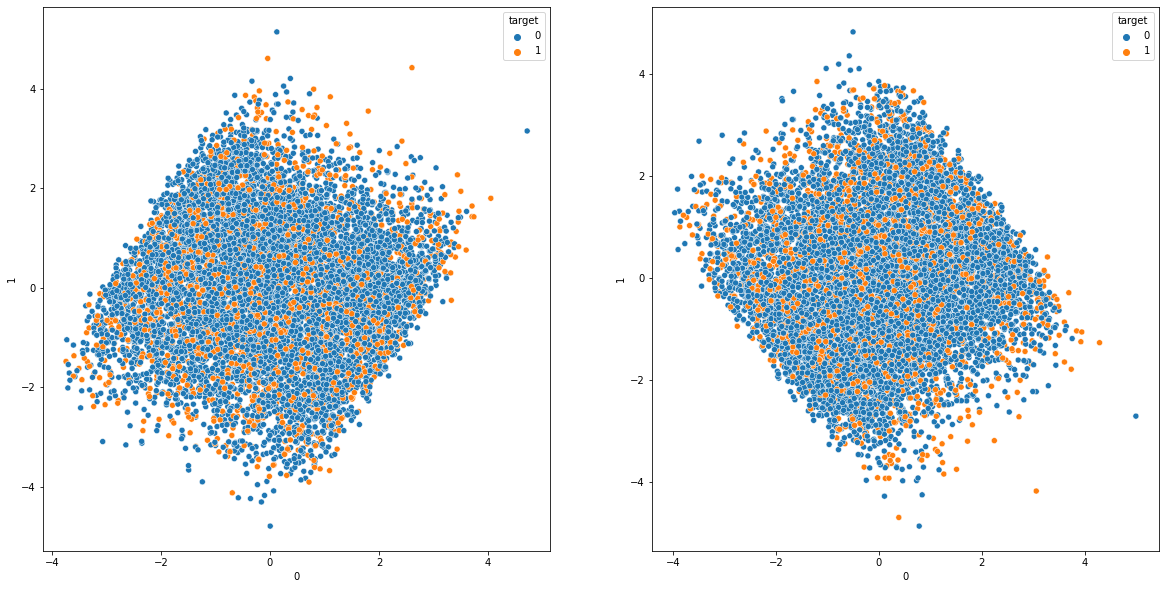

In [ ]:
# 主成分分析したものを可視化
# 特徴をとらえきれていない
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# 第一主成分と第二主成分の散布図で特徴を捉えられているか確認
train_pca = pd.concat([train_x_pca, train_y], axis=1)
train_svd = pd.concat([train_x_svd, train_y], axis=1)

sns.scatterplot(x=train_pca[0], y=train_pca[1], hue=train_pca['target'], ax=ax1)
sns.scatterplot(x=train_svd[0], y=train_svd[1], hue=train_pca['target'], ax=ax2)


In [ ]:
# train_xの特徴量が正規分布だったのかを確認(0-58まで存在)
# 2, 3, 16, 17は正規分布に近い
sns.displot(data=train_x, x=0)
sns.displot(data=train_x, x=1)
sns.displot(data=train_x, x=2)
sns.displot(data=train_x, x=3)
sns.displot(data=train_x, x=4)
sns.displot(data=train_x, x=5)
sns.displot(data=train_x, x=6)
sns.displot(data=train_x, x=7)
sns.displot(data=train_x, x=8)
sns.displot(data=train_x, x=9)
sns.displot(data=train_x, x=10)
sns.displot(data=train_x, x=11)
sns.displot(data=train_x, x=12)
sns.displot(data=train_x, x=13)
sns.displot(data=train_x, x=14)
sns.displot(data=train_x, x=15)
sns.displot(data=train_x, x=16)
sns.displot(data=train_x, x=17)
sns.displot(data=train_x, x=18)
sns.displot(data=train_x, x=19)

In [ ]:
# 2, 3, 16, 17に絞ってpcaをかけてみる
# -----------------------------------
# PCA
# -----------------------------------
# 標準化されたデータを用いる
train_x, test_x = load_standarized_data()

#2, 3, 16, 17に絞る
train_x = train_x[[2, 3, 16, 17]]
# -----------------------------------
# PCA
from sklearn.decomposition import PCA

# データは標準化などのスケールを揃える前処理が行われているものとする

# 学習データに基づいてPCAによる変換を定義
# n_componentsは次元数
pca = PCA(n_components=2)
pca.fit(train_x)

# 変換の適用
train_x_pca = pd.DataFrame(pca.transform(train_x))

# 学習データに基づいてSVDによる変換を定義
# TruncatedSVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=71)
svd.fit(train_x)

# 変換の適用
train_x_svd = pd.DataFrame(svd.transform(train_x))


print('before')
display(train_x.head())
print('PCA')
display(train_x_pca.head())
print('SVD')
display(train_x_svd.head())

before


,2,3,16,17
0,0.058742,0.388110,-1.580051,-0.457569
1,-0.165636,-0.402399,1.329289,0.130607
2,0.166873,-0.617178,0.133014,0.728426
3,1.190962,0.960153,0.410550,-0.351505
4,-0.821325,0.409007,0.266997,-1.421793


PCA


,0,1
0,0.290960,-1.456780
1,-0.389471,1.052769
2,-0.292067,0.603104
3,1.509955,0.003595
4,-0.339550,-0.776905


SVD


,0,1
0,0.290960,-1.456780
1,-0.389471,1.052769
2,-0.292067,0.603104
3,1.509955,0.003595
4,-0.339550,-0.776905


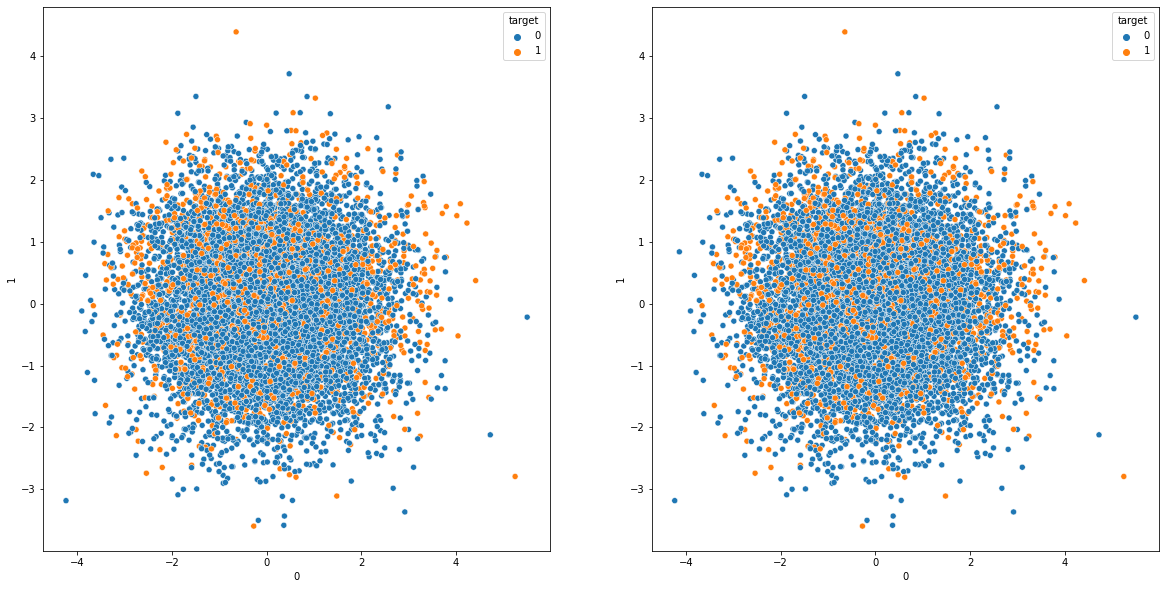

In [ ]:
# 再度主成分分析したものを可視化
# 特徴をとらえきれていない
# この２つの主成分は目的変数を表すものからはまだ遠いという結論
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# 第一主成分と第二主成分の散布図で特徴を捉えられているか確認
train_pca = pd.concat([train_x_pca, train_y], axis=1)
train_svd = pd.concat([train_x_svd, train_y], axis=1)

sns.scatterplot(x=train_pca[0], y=train_pca[1], hue=train_pca['target'], ax=ax1)
sns.scatterplot(x=train_svd[0], y=train_svd[1], hue=train_pca['target'], ax=ax2)


## 非負値行列因子分解 Non-negative Matrix Factorization NMF  
- 非負の行列データをより少数の要素の非負の行列の積で近似する
- 非負データしか扱えない
- PCAと違い、非負のベクトルの和の形で表すことができる

In [ ]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd
import os

# パス移動
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input"

# path先フォルダ内のファイルを確認
DATA_PATH = "./"
for filename in os.listdir(DATA_PATH):
    print(filename)

# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train = pd.read_csv(DATA_PATH + 'train_preprocessed_onehot.csv')
train_x = train.drop(['target'], axis=1)
train_y = train['target']
test_x = pd.read_csv(DATA_PATH + 'test_preprocessed_onehot.csv')

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化を行った学習データとテストデータを返す関数
def load_standarized_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return pd.DataFrame(train_x), pd.DataFrame(test_x)


# MinMaxスケーリングを行った学習データとテストデータを返す関数
def load_minmax_scaled_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    # Min-Max Scalingを行う
    scaler = MinMaxScaler()
    scaler.fit(pd.concat([train_x, test_x], axis=0))
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)

    return pd.DataFrame(train_x), pd.DataFrame(test_x)

# -----------------------------------
# NMF
# -----------------------------------
# 非負の値とするため、MinMaxスケーリングを行ったデータを用いる
train_x, test_x = load_minmax_scaled_data()
# -----------------------------------
from sklearn.decomposition import NMF

# データは非負の値から構成されているとする

# 学習データに基づいてNMFによる変換を定義
model = NMF(n_components=5, init='random', random_state=71)
model.fit(train_x)

# 変換の適用
train_x_nmf = pd.DataFrame(model.transform(train_x))
test_x_nmf = pd.DataFrame(model.transform(test_x))

print('before')
display(train_x.head())
print('NMF')
display(train_x_nmf.head())

/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input
time_series_wide.csv
test_preprocessed_onehot.csv
train_preprocessed_onehot.csv
before


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,0.608108,1.0,0.517477,0.430295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.69997,0.302439,0.452038,0.111111,0.111111,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.500497,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.090909,0.066667,0.043478,0.0,1.0
1,0.851351,0.0,0.487401,0.331590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.69997,0.673171,0.525180,0.333333,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166290,0.500497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.363636,0.266667,0.173913,1.0,1.0
2,0.972973,1.0,0.531971,0.304772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.59996,0.520732,0.599520,0.111111,0.888889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.500497,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.090909,0.400000,0.565217,0.0,1.0
3,0.162162,1.0,0.669243,0.501723,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.79998,0.556098,0.465228,0.222222,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.583300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.545455,0.166667,0.260870,0.0,0.0
4,0.770270,0.0,0.399511,0.432905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.89999,0.537805,0.332134,0.000000,0.444444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.500497,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.727273,0.533333,0.869565,0.0,1.0


NMF


,0,1,2,3,4
0,0.759864,0.000000,0.023496,0.000000,0.000000
1,0.710340,0.015354,0.000000,0.008257,0.021672
2,0.663898,0.640938,0.142054,0.000000,0.445507
3,0.000000,0.000000,0.481716,0.000000,0.012412
4,0.000000,0.646360,0.437539,0.312156,0.582459


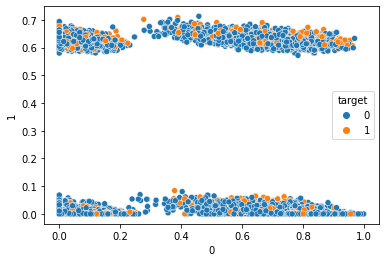

In [ ]:
# NMFしたものを可視化
# 特徴をとらえきれていない
# この２つの主成分は目的変数を表すものからはまだ遠いという結論
import matplotlib.pyplot as plt
import seaborn as sns
# 第一主成分と第二主成分の散布図で特徴を捉えられているか確認
train_nmf = pd.concat([train_x_nmf, train_y], axis=1)

sns.scatterplot(x=train_nmf[0], y=train_nmf[1], hue=train_nmf['target'])

In [ ]:
# -----------------------------------
# NMF
# -----------------------------------
# 非負の値とするため、MinMaxスケーリングを行ったデータを用いる
train_x, test_x = load_minmax_scaled_data()
# -----------------------------------
#2, 3, 16, 17に絞る(正規分布に近い変数)
train_x = train_x[[2, 3, 16, 17]]


from sklearn.decomposition import NMF

# データは非負の値から構成されているとする

# 学習データに基づいてNMFによる変換を定義
model = NMF(n_components=2, init='random', random_state=71)
model.fit(train_x)

# 変換の適用
train_x_nmf = pd.DataFrame(model.transform(train_x))
# test_x_nmf = pd.DataFrame(model.transform(test_x))

print('before')
display(train_x.head())
print('NMF')
display(train_x_nmf.head())

before


,2,3,16,17
0,0.517477,0.430295,0.302439,0.452038
1,0.487401,0.331590,0.673171,0.525180
2,0.531971,0.304772,0.520732,0.599520
3,0.669243,0.501723,0.556098,0.465228
4,0.399511,0.432905,0.537805,0.332134


NMF


,0,1
0,1.017715,0.286115
1,0.697254,0.757487
2,0.768149,0.667981
3,1.214578,0.450028
4,0.794232,0.455920


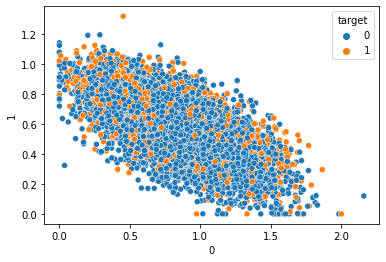

In [ ]:
# NMFしたものを再度可視化
# 特徴をとらえきれていない
# この２つの主成分は目的変数を表すものからはまだ遠いという結論
import matplotlib.pyplot as plt
import seaborn as sns
# 第一主成分と第二主成分の散布図で特徴を捉えられているか確認
train_nmf = pd.concat([train_x_nmf, train_y], axis=1)

sns.scatterplot(x=train_nmf[0], y=train_nmf[1], hue=train_nmf['target'])

## Latent Dirichlet Allocation LDA
- 自然言語処理において文書を分類するトピックモデルで用いられる手法  
  - トピックモデル：文書が複数の潜在的なトピックから確率的に生成されると仮定したモデルのこと
    - [トピックモデルとは \| データ分析基礎知識](https://www.albert2005.co.jp/knowledge/machine_learning/topic_model/about_topic_model#:~:text=%E3%83%88%E3%83%94%E3%83%83%E3%82%AF%E3%83%A2%E3%83%87%E3%83%AB%E3%81%A8%E3%81%AF%E3%80%81%E6%96%87%E6%9B%B8,%E6%84%8F%E5%91%B3%E3%82%92%E8%A7%A3%E6%9E%90%E3%81%A7%E3%81%8D%E3%81%BE%E3%81%99%E3%80%82)  
  - 線形判別分析と混同を注意（同じLDAと表現される）
  - 文書を行、単語を列として各単語が何回表れたかを示す単語文書のカウント行列の準備（前処理）が必要
  - 一旦詳細は外す（）

## 線形判別分析　Linear Discriminant Analysis LDA  
- **分類タスクについて教師ありで次元削減を行う方法**
- 削減後の次元数は目的変数クラス数よりも小さくなる  
  - 二値分類だと変換後は１次元の値になる  

[線形判別分析\(Linear Discriminant Analysis\) LDA 次元削減 – S\-Analysis](https://data-analysis-stats.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92/%E7%B7%9A%E5%BD%A2%E5%88%A4%E5%88%A5%E5%88%86%E6%9E%90linear-discriminant-analysis-lda-%E6%AC%A1%E5%85%83%E5%89%8A%E6%B8%9B/)

In [ ]:
# https://data-analysis-stats.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92/%E7%B7%9A%E5%BD%A2%E5%88%A4%E5%88%A5%E5%88%86%E6%9E%90linear-discriminant-analysis-lda-%E6%AC%A1%E5%85%83%E5%89%8A%E6%B8%9B/
# データロード
import pandas as pd
import seaborn as sns

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# penguins['species_short'] = penguins['species_short'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
# penguins['species_short'].unique()

In [ ]:
# Category to Numeric Transformation
species_short_map = {'species_short': {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}}
penguins.replace(species_short_map, inplace=True)
penguins['species_short'] = penguins['species_short'].astype(float)

island_map = {'island': {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}}
penguins.replace(island_map, inplace=True)
penguins['island'] = penguins['island'].astype(float)

penguins['sex'] = penguins['sex'].map({'MALE': 0,'FEMALE': 1})

penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,0.0
1,0.0,2.0,39.5,17.4,186.0,3800.0,1.0
2,0.0,2.0,40.3,18.0,195.0,3250.0,1.0
3,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,0.0,2.0,36.7,19.3,193.0,3450.0,1.0


In [ ]:
# Count Null
print('Total Null', penguins.isnull().values.sum())
print(penguins.isnull().sum())

# Drop Null
penguins = penguins.dropna()
print('Total Null', penguins.isnull().values.sum())

Total Null 19
species_short         0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Total Null 0


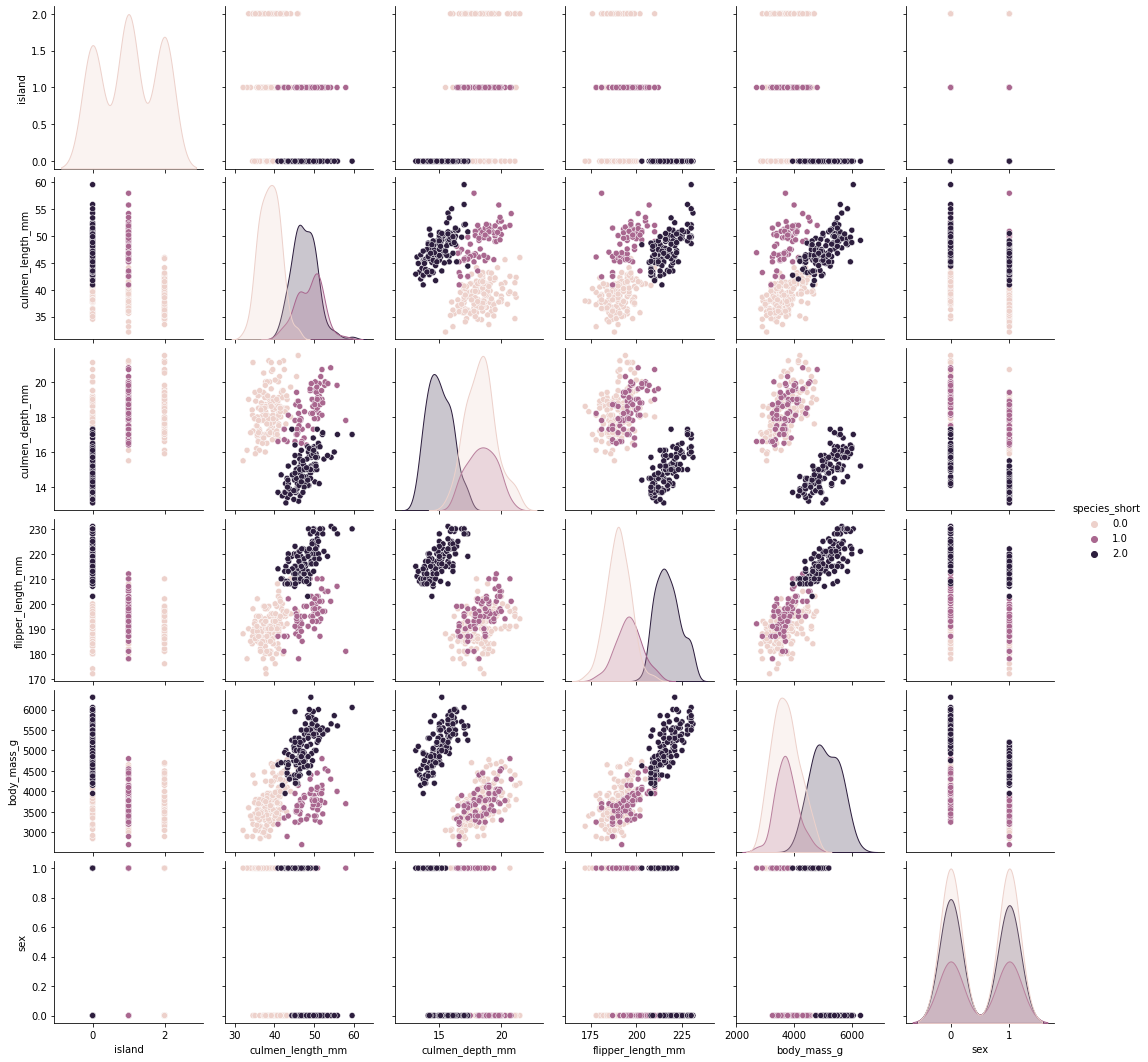

In [ ]:
# 散布図行列で可視化
sns.pairplot(penguins, hue='species_short')

In [ ]:
X = penguins.drop(['species_short'], axis=1).to_numpy()
y = penguins['species_short'].to_numpy()
target_names = ['Adelie', 'Chinstrap', 'Gentoo']

print(X.shape)
print(y.shape)
print(target_names)

(333, 6)
(333,)
['Adelie', 'Chinstrap', 'Gentoo']


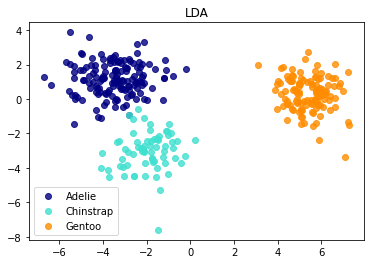

In [ ]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd
import os

# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train_x = X.copy()
train_y = y.copy()
# 暫定
test_x = X.copy()

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化を行った学習データとテストデータを返す関数
def load_standarized_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return pd.DataFrame(train_x), pd.DataFrame(test_x)


# MinMaxスケーリングを行った学習データとテストデータを返す関数
def load_minmax_scaled_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    # Min-Max Scalingを行う
    scaler = MinMaxScaler()
    scaler.fit(pd.concat([train_x, test_x], axis=0))
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)

    return pd.DataFrame(train_x), pd.DataFrame(test_x)

import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 線形判別分析 (LDA) 
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

colors = ['navy', 'turquoise', 'darkorange']

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')

plt.show()

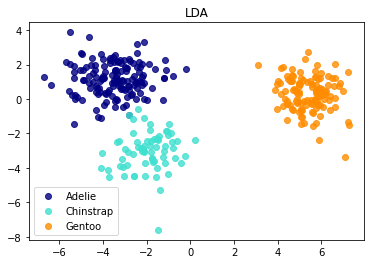

In [ ]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd
import os

# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train_x = X.copy()
train_y = y.copy()
# 暫定
test_x = X.copy()

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化を行った学習データとテストデータを返す関数
def load_standarized_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return train_x, test_x


# MinMaxスケーリングを行った学習データとテストデータを返す関数
def load_minmax_scaled_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    # Min-Max Scalingを行う
    scaler = MinMaxScaler()
    scaler.fit(pd.concat([train_x, test_x], axis=0))
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)

    return train_x, test_x

X, tmp = load_standarized_data()

import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 線形判別分析 (LDA) 
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

colors = ['navy', 'turquoise', 'darkorange']

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')

plt.show()

In [ ]:
X_r2

In [ ]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd
import os

# パス移動
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input"

# path先フォルダ内のファイルを確認
DATA_PATH = "./"
for filename in os.listdir(DATA_PATH):
    print(filename)

# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train = pd.read_csv(DATA_PATH + 'train_preprocessed_onehot.csv')
train_x = train.drop(['target'], axis=1)
train_y = train['target']
test_x = pd.read_csv(DATA_PATH + 'test_preprocessed_onehot.csv')

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化を行った学習データとテストデータを返す関数
def load_standarized_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return pd.DataFrame(train_x), pd.DataFrame(test_x)


# MinMaxスケーリングを行った学習データとテストデータを返す関数
def load_minmax_scaled_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    # Min-Max Scalingを行う
    scaler = MinMaxScaler()
    scaler.fit(pd.concat([train_x, test_x], axis=0))
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)

    return pd.DataFrame(train_x), pd.DataFrame(test_x)


# -----------------------------------
# LinearDiscriminantAnalysis
# -----------------------------------
# 標準化されたデータを用いる
train_x, test_x = load_standarized_data()
# -----------------------------------
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# データは標準化などのスケールを揃える前処理が行われているものとする

# 学習データに基づいてLDAによる変換を定義
lda = LDA(n_components=1)
lda.fit(train_x, train_y)

# 変換の適用
train_x_lda = lda.transform(train_x)
test_x_lda = lda.transform(test_x)

display(train_x)
display(train_x_lda)

/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input
time_series_wide.csv
test_preprocessed_onehot.csv
train_preprocessed_onehot.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,0.367868,0.812590,0.058742,0.388110,-0.496404,-0.335182,-0.500312,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,2.978535,-0.227963,0.913244,-1.580051,-0.457569,-0.696940,-1.190812,-0.9994,-0.574887,2.007531,-0.236807,-0.250173,4.030059,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,-0.249495,-0.245628,-0.25421,-0.258419,-0.259299,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,-0.477408,-0.000085,0.496717,-1.008436,-0.504371,-0.228206,-0.139542,1.230376,-0.330921,0.501562,-0.660895,-0.230621,-1.009848,-1.296420,-1.449062,-1.526426,-0.649981,0.499687
1,1.198320,-1.230633,-0.165636,-0.402399,2.014490,-0.335182,-0.500312,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,-0.335736,-0.227963,0.913244,1.329289,0.130607,0.714155,-0.145996,-0.9994,1.739473,-0.498124,-0.236807,-0.250173,-0.248135,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,4.008098,-0.245628,-0.25421,-0.258419,-0.259299,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,0.012853,-0.000085,-2.013221,-1.008436,-0.504371,-0.228206,-0.139542,-0.812759,3.021872,0.501562,-0.660895,-0.230621,-1.009848,-0.433942,-0.766514,-1.093119,1.538507,0.499687
2,1.613547,0.812590,0.166873,-0.617178,-0.496404,-0.335182,1.998751,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,-0.335736,-0.227963,0.624166,0.133014,0.728426,-0.696940,1.247092,-0.9994,-0.574887,-0.498124,4.222842,-0.250173,-0.248135,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,-0.249495,-0.245628,-0.25421,-0.258419,3.856555,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,0.509800,-0.000085,0.496717,0.991635,1.982667,-0.228206,-0.139542,1.230376,-0.330921,0.501562,-0.660895,-0.230621,0.990248,-1.296420,-0.311481,0.206803,-0.649981,0.499687
3,-1.154629,0.812590,1.190962,0.960153,-0.496404,-0.335182,-0.500312,4.931172,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,-0.335736,-0.227963,1.202323,0.410550,-0.351505,0.008608,-1.190812,1.0006,-0.574887,-0.498124,-0.236807,-0.250173,-0.248135,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,-0.249495,-0.245628,3.93376,-0.258419,-0.259299,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,0.509800,0.648734,0.496717,-1.008436,-0.504371,-0.228206,-0.139542,-0.812759,-0.330921,0.501562,-0.660895,-0.230621,-1.009848,0.141044,-1.107788,-0.804247,-0.649981,-2.001251
4,0.921503,-1.230633,-0.821325,0.409007,-0.496404,2.983453,-0.500312,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,-0.335736,-0.227963,1.491401,0.266997,-1.421793,-1.402487,-0.145996,1.0006,-0.574887,-0.498124,-0.236807,-0.250173,-0.248135,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,-0.249495,-0.245628,3.93376,-0.258419,-0.259299,-0.246998,-0.251973,-0.251524,-0.251299,-0.250849,0.509800,-0.000085,-2.013221,0.991635,1.982667,-0.228206,-0.139542,-0.812759,3.021872,0.501562,1.513101,-0.230621,0.990248,0.716029,0.143551,1.217854,-0.649981,0.499687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.875367,0.812590,1.789598,1.169712,-0.496404,2.983453,-0.500312,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,-0.336473,-0.335736,-0.227963,-0.532148,-1.053690,-0.168302,3.536344,0.898820,1.0006,-0.574887,-0.498124,-0.236807,-0.250173,-0.248135,-0.240784,-0.250173,-0.246998,-0.233968,-0.259079,-0.249495,-0.245628,-0.25421,-0.258419,-0.259299,-0.246998,3.968680,-0.251524,-0.251299,-0.250849,0.509800,-0.000085,0.496717,0.991635,-0.504371,-0.228206,-0.139542,-0.812759,-0.330921,0.501562,1.513101,-0.230621,-1.009848,1.003522,0.598584,-0.370940,-0.649981,0.499687
9996,-0.416449,-1.230633,0.192193,1.320187,-0.496404,-0.335182,-0.500312,-0.202792,-0.143584,-0.20492,-0.332592,-0.227234,2.972010,-0.335736,-0.227963,-1.

array([[-0.23068727],
       [-0.36472287],
       [ 1.28408347],
       ...,
       [-0.85944936],
       [-0.53029345],
       [-0.46604975]])

## t-SNE
- 比較的新しい手法 可視化の目的で用いられることが多い
- 元の特徴空間上で近い点が圧縮後の平面でも近くなるように圧縮される
- 元の特徴量にこれらの結果を**加えて**精度が上がることがある
- 計算コストが大きいので3次元を超える圧縮には不向き

In [ ]:
!pip install bhtsne

     |████████████████████████████████| 86 kB 2.9 MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp37-cp37m-linux_x86_64.whl size=214613 sha256=e951d7117f5e1ac172250ce46e327264f3ce10d5e2feb2c7bf8edddb719d587a
  Stored in directory: /root/.cache/pip/wheels/e4/4c/71/26b7b0736d179d6bfe9d753629955515bf7ba7c1c8a8d98cb4
Successfully built bhtsne


In [ ]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd
import os

# パス移動
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input"

# path先フォルダ内のファイルを確認
DATA_PATH = "./"
for filename in os.listdir(DATA_PATH):
    print(filename)

# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train = pd.read_csv(DATA_PATH + 'train_preprocessed_onehot.csv')
train_x = train.drop(['target'], axis=1)
train_y = train['target']
test_x = pd.read_csv(DATA_PATH + 'test_preprocessed_onehot.csv')

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化を行った学習データとテストデータを返す関数
def load_standarized_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return pd.DataFrame(train_x), pd.DataFrame(test_x)


# MinMaxスケーリングを行った学習データとテストデータを返す関数
def load_minmax_scaled_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    # Min-Max Scalingを行う
    scaler = MinMaxScaler()
    scaler.fit(pd.concat([train_x, test_x], axis=0))
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)

    return pd.DataFrame(train_x), pd.DataFrame(test_x)

# -----------------------------------
# t-sne
# -----------------------------------
# 標準化されたデータを用いる
train_x, test_x = load_standarized_data()
# -----------------------------------
import bhtsne

# データは標準化などのスケールを揃える前処理が行われているものとする

# t-sneによる変換
data = pd.concat([train_x, test_x])
embedded = bhtsne.tsne(data.astype(np.float64), dimensions=2, rand_seed=71)

/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input
time_series_wide.csv
test_preprocessed_onehot.csv
train_preprocessed_onehot.csv


## UMAP
- t-SNE同様
- 処理時間がt-SNEの数分の1程度

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 40.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=b3c54522f3ca6496c72524fdb74247093a8f9be5c8a19f7d74138763a9c4e574
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=006dd4fcaf328bbb42309d10b730550b86034a854952daeb1807b14a88f48f3a
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd
import os

# パス移動
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input"

# path先フォルダ内のファイルを確認
DATA_PATH = "./"
for filename in os.listdir(DATA_PATH):
    print(filename)

# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train = pd.read_csv(DATA_PATH + 'train_preprocessed_onehot.csv')
train_x = train.drop(['target'], axis=1)
train_y = train['target']
test_x = pd.read_csv(DATA_PATH + 'test_preprocessed_onehot.csv')

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化を行った学習データとテストデータを返す関数
def load_standarized_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return pd.DataFrame(train_x), pd.DataFrame(test_x)


# MinMaxスケーリングを行った学習データとテストデータを返す関数
def load_minmax_scaled_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    # Min-Max Scalingを行う
    scaler = MinMaxScaler()
    scaler.fit(pd.concat([train_x, test_x], axis=0))
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)

    return pd.DataFrame(train_x), pd.DataFrame(test_x)
# -----------------------------------
# UMAP
# -----------------------------------
# 標準化されたデータを用いる
train_x, test_x = load_standarized_data()
# -----------------------------------
import umap

# データは標準化などのスケールを揃える前処理が行われているものとする

# 学習データに基づいてUMAPによる変換を定義
um = umap.UMAP()
um.fit(train_x)

# 変換の適用
train_x = um.transform(train_x)
test_x = um.transform(test_x)

/content/drive/MyDrive/Colab Notebooks/Kaggleで勝つデータ分析の技術/input
time_series_wide.csv
test_preprocessed_onehot.csv
train_preprocessed_onehot.csv


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
train_x

array([[ 3.87315  , 23.134487 ],
       [13.089225 , -1.0707494],
       [ 4.214186 , 15.717368 ],
       ...,
       [11.149105 , 11.892182 ],
       [21.41246  ,  3.7904878],
       [ 9.579261 , -7.6793504]], dtype=float32)

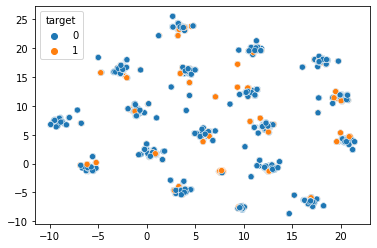

In [ ]:
import seaborn as sns
sns.scatterplot(x=train_x[:, 0], y=train_x[:, 1], hue=train_y)

## クラスタリング
- クラスタ分類をカテゴリ変数とする
- クラスタ重心からの距離も出力可能
-比較的よく用いられるアルゴリズム
 - K-means, 高速に計算したい場合は ** Mini-Batch K-Means **も使われる
 - DBSCAN
 - Agglomerative Clustering
 - LocalOutlierFactor(Kaggle打音検知で利用)

In [ ]:
# -----------------------------------
# クラスタリング
# -----------------------------------
# 標準化されたデータを用いる
train_x, test_x = load_standarized_data()
# -----------------------------------
from sklearn.cluster import MiniBatchKMeans

# データは標準化などのスケールを揃える前処理が行われているものとする

# 学習データに基づいてMini-Batch K-Meansによる変換を定義
kmeans = MiniBatchKMeans(n_clusters=10, random_state=71)
kmeans.fit(train_x)

# 属するクラスタを出力する
train_clusters = kmeans.predict(train_x)
test_clusters = kmeans.predict(test_x)

# 各クラスタの中心までの距離を出力する
train_distances = kmeans.transform(train_x)
test_distances = kmeans.transform(test_x)

In [ ]:
import pandas as pd
a = pd.read_csv('https://raw.githubusercontent.com/ghmagazine/kagglebook/master/input/sample-data/train_preprocessed_onehot.csv').reset_index(drop=True)
a.head()

,age,sex,height,weight,product_0,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,amount,medical_info_a1,medical_info_a2,medical_info_a3,medical_info_b1,medical_info_b2_0,medical_info_b2_1,medical_info_b2_2,medical_info_b2_3,medical_info_b3_0,medical_info_b3_1,medical_info_b3_2,medical_info_b3_3,medical_info_b3_4,medical_info_b3_5,medical_info_b3_6,medical_info_b3_7,medical_info_b3_8,medical_info_b3_9,medical_info_b3_10,medical_info_b3_11,medical_info_b3_12,medical_info_b3_13,medical_info_b3_14,medical_info_b3_15,medical_info_b3_16,medical_info_c1,medical_info_c2,medical_keyword_1,medical_keyword_2,medical_keyword_3,medical_keyword_4,medical_keyword_5,medical_keyword_6,medical_keyword_7,medical_keyword_8,medical_keyword_9,medical_keyword_10,year,month,day,yearmonth,medical_info_c1_nan,medical_info_c2_nan,target
0,50,1,166.445608,65.016732,0,0,0,0,0,0,0,0,0,1,0,7000000,134,202,1,11,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,15.009107,1,0,0,0,0,1,0,1,0,0,2015,2,3,24182,False,True,0
1,68,0,164.334615,56.544217,1,0,0,0,0,0,0,0,0,0,0,7000000,438,263,3,14,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.496614,15.009107,0,0,0,0,0,0,1,1,0,0,2015,5,9,24185,True,True,0
2,77,1,167.462917,54.242267,0,0,1,0,0,0,0,0,0,0,0,6000000,313,325,1,18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.000000,15.009107,1,1,1,0,0,1,0,1,0,0,2016,2,13,24194,False,True,1
3,17,1,177.097725,71.147762,0,0,0,1,0,0,0,0,0,0,0,8000000,342,213,2,11,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.000000,16.167065,1,0,0,0,0,0,0,1,0,0,2015,7,6,24187,False,False,0
4,62,0,158.165788,65.240697,0,1,0,0,0,0,0,0,0,0,0,9000000,327,102,0,14,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.000000,15.009107,0,1,1,0,0,0,1,1,1,0,2016,9,17,24201,False,True,1
